**NLP Analysis - Reviews Data**

# Introduction

## Read in libraries, data, and set notebook preferences

**Read in libraries**

In [14]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read in data**

In [64]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\03_Processed'

#Read in data
df = pd.read_csv(path + '/2020_0208_Reviews_Processed_NLP.csv',sep=',',
                 parse_dates=['date'])

**Set preferences for notebook**

In [16]:
#Ignore warnings
import warnings; warnings.simplefilter('ignore')

#Increase number of columns and rows displayed by Pandas
pd.set_option('display.max_colwidth',1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows',100)

#Set style for plots
plt.style.use('ggplot')

## Preview data

In [59]:
#Preview data and shape
print('Reviews data shape:', df.shape)
display(df.head())

Reviews data shape: (425509, 7)


,comments,date,sentiment_compound,word_count,comments_pos_tag,comments_lemma,label
0,"Hello Josh Thank you very much for everything. I found myself very comfortable in your home. Quiet, comfortable and very complete and very clean, which I value highly. Next time I'd come with my family. I hope it's possible.",2013-12-01,0.9534,39,"[('hello', 'NN'), ('josh', 'NN'), ('thank', 'VBD'), ('much', 'JJ'), ('everything', 'NN'), ('comfortable', 'JJ'), ('home', 'NN'), ('quiet', 'RBR'), ('comfortable', 'JJ'), ('complete', 'JJ'), ('clean', 'JJ'), ('highly', 'RB'), ('next', 'JJ'), ('time', 'NN'), ('come', 'VBN'), ('possible', 'JJ')]","['hello', 'josh', 'thank', 'much', 'everything', 'comfortable', 'home', 'quiet', 'comfortable', 'complete', 'clean', 'highly', 'next', 'time', 'come', 'possible']",positive
1,"Stop and book it now. Rea (Website hidden by Airbnb) this later!!! If your a single person looking for a story book San Francisco experience, look no farther. Staying in Mikes place couldn't be any more wonderful. If your familiar with ""Tales of the City"" Mike is the Olympia Dukakis. The home is warm and inviting with all the nuances of an old Victorian. Mike is an amazing host . He can tell you how walk drive or public transit the city (don't bother with a car). Would love to keep the gem to myself but everyone deserves this unique place to lay your head. Make sure while you're there be introduced to William . Book IT you won't be disappointed .",2017-06-07,0.9334,122,"[('stop', 'VB'), ('book', 'NN'), ('rea', 'JJ'), ('website', 'RB'), ('hidden', 'VBP'), ('later', 'RB'), ('person', 'NN'), ('looking', 'VBG'), ('book', 'NN'), ('san', 'JJ'), ('francisco', 'JJ'), ('experience', 'NN'), ('look', 'NN'), ('staying', 'VBG'), ('place', 'NN'), ('wonderful', 'NN'), ('familiar', 'JJ'), ('tales', 'NNS'), ('city', 'NN'), ('mike', 'NN'), ('olympia', 'VBP'), ('dukakis', 'NN'), ('home', 'NN'), ('inviting', 'NN'), ('nuances', 'NNS'), ('old', 'JJ'), ('victorian', 'JJ'), ('mike', 'NN'), ('amazing', 'VBG'), ('host', 'NN'), ('tell', 'NN'), ('walk', 'VBP'), ('drive', 'JJ'), ('transit', 'NN'), ('city', 'NN'), ('would', 'MD'), ('love', 'VB'), ('gem', 'NN'), ('everyone', 'NN'), ('deserves', 'VBZ'), ('unique', 'JJ'), ('place', 'NN'), ('head', 'NN'), ('make', 'VBP'), ('sure', 'JJ'), ('book', 'NN'), ('disappointed', 'VBD')]","['stop', 'book', 'rea', 'website', 'hide', 'later', 'person', 'look', 'book', 'san', 'francisco', 'experience', 'look', 'stay', 'place', 'wonderful', 'familiar', 'tale', 'city', 'mike', 'olympia', 'dukakis', 'home', 'inviting', 'nuance', 'old', 'victorian', 'mike', 'amaze', 'host', 'tell', 'walk', 'drive', 'transit', 'city', 'would', 'love', 'gem', 'everyone', 'deserve', 'unique', 'place', 'head', 'make', 'sure', 'book', 'disappoint']",positive
2,"So I moved to SF in late May from Michigan to intern at Genentech for the summer. I stayed at Anjan’s apartment for 7 days while I was looking for a more permanent housing situation. Anjan was extremely hospitable and welcoming throughout the week. He was also very knowledgeable about the area and always offered to help in any way that he could. The area (SOMA) is very safe and is very “walkable.” There are plenty of restaurants and stores nearby (there’s even a target a few blocks away), so you have everything you need within a couple blocks from the apartment. As for the bedroom, it was spacious and clean. The bathroom was nice and I had to myself for the entirety of my stay. I felt very comfortable living at Anjan’s for a week and I really enjoyed staying there. If you’re a respectful person and are looking for a place to stay in SF for a short time, I highly recommend staying at Anjan’s. He’s a great person and a great host.",2013-06-02,0.9860,175,"[('moved', 'VBN'), ('may', 'MD'), ('michigan', 'VB'), ('summer', 'NN'), ('days', 'NNS'), ('looking', 'VBG'), ('permanent', 'JJ'), ('housing', 'NN'), ('situation', 'NN'), ('anjan', 'VBZ'), ('extremely', 'RB'), ('hospitable', 'JJ'), ('welcoming', 'VBG')

# Data Exploration

### Histogram of sentiment scores

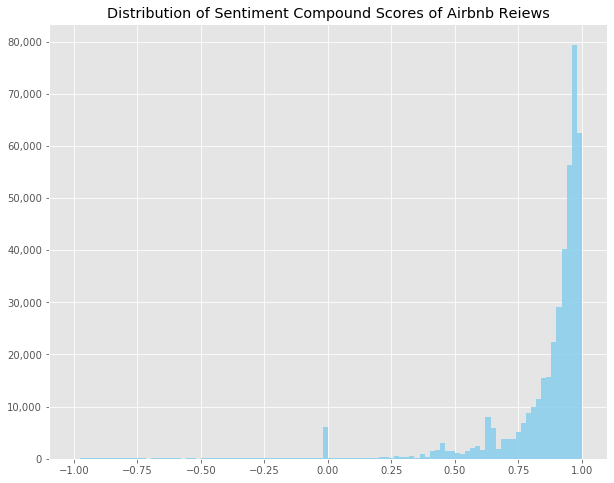

In [19]:
#Set plot
fig, ax = plt.subplots(figsize = (10,8))

#Plot hist of sentiment_compound scores
j = df.sentiment_compound.hist(ax = ax,bins = 100, color = 'skyblue', alpha = .85)

#Set plot aesthetics
j.set_title('Distribution of Sentiment Compound Scores of Airbnb Reiews')
ax.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

### Positive, neutral, and negative review counts

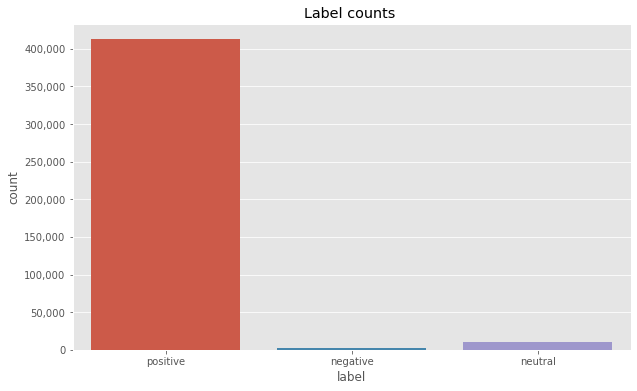

In [70]:
#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#plot data
g =sns.countplot(x='label', data = df, hue_order = ['positive', 'neutral', 'negative'])

#Set plot aesthetics
g.set_title('Label Counts ')
g.set_yticklabels(['{:,}'.format(int(y)) for y in ax.get_yticks()]);

### Distribution of review lengths for positive and negative reviews

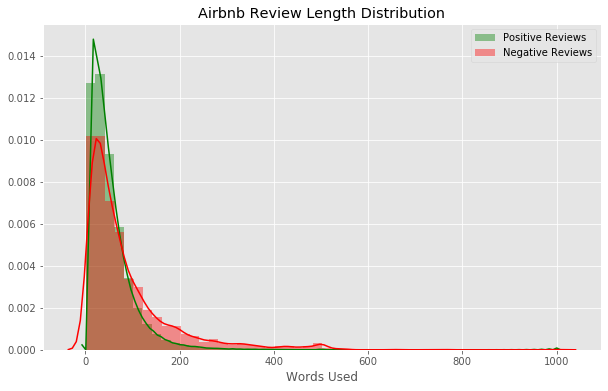

In [65]:
#Set plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot Histograms for word count
sns.distplot(df.word_count.loc[df['label'] == 'positive'], kde = True, bins = 50, color = 'g', ax=ax)
sns.distplot(df.word_count.loc[df['label'] == 'negative'], kde = True, bins = 50, color = 'r', ax=ax)

#Set plot aesthetics
ax.legend(labels = ['Positive Reviews', 'Negative Reviews', 'Neutral Reviews'], frameon = True);
ax.set_title('Airbnb Review Length Distribution')
ax.set_xlabel('Words Used');

Let's look at a subset of some of these reviews

Word Clouds


In [92]:
#Positive Word Cloud

In [26]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image


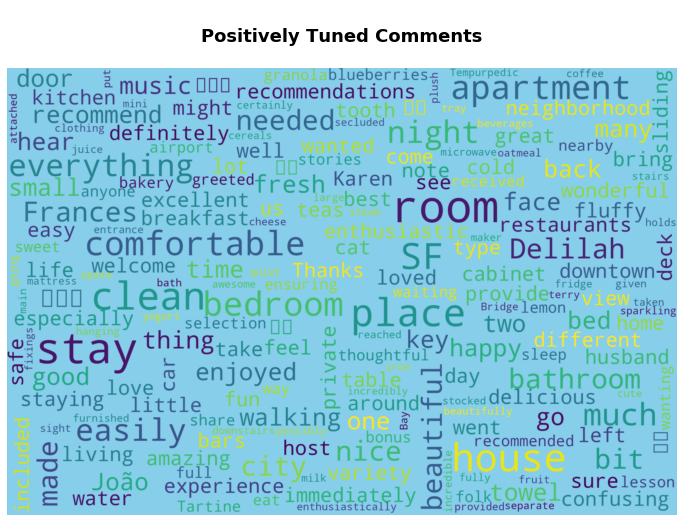

In [27]:
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="skyblue",
                      width= 3000, height = 2000).generate(str(positive_reviews.comments.values))

def plot_wordcloud(wordcloud, language):
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.title(language + ' Comments\n', fontsize=18, fontweight='bold')
    plt.show()
    
plot_wordcloud(wordcloud, '\nPositively Tuned')

In [95]:
#What are the most popular words in positive reviews?

In [96]:
#Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english').fit(positive_reviews.comments)

print('Vocabulary used in positive reviews: {}'.format(len(count.vocabulary_)))

bow = count.transform(positive_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in positive reviews: 16162


# Topic modeling and document clustering for postive reviews

In [100]:
#Import libraries
import gensim
from gensim.parsing.preprocessing import preprocess_string
from gensim.models import Phrases
from gensim import corpora, models, similarities

In [101]:
#Apply preprocess and stem original comments
docs = np.array(positive_reviews['comments'].apply(preprocess_string))

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [102]:
#Create dictionary of tokens and print info
dictionary = corpora.Dictionary(docs)
print('Number of unique words in original documents: {}'.format(len(dictionary)))

Number of unique words in original documents: 12508


**Remove rare or common tokens**

In [103]:
#Filter words that occur in less than 10 documents or more than 25% of documents
dictionary.filter_extremes(no_below= 10,no_above=.25 )

print('Number of unique words after removing rare and common words: {}'.format(len(dictionary)))

Number of unique words after removing rare and common words: 3320


In [104]:
#Vectorize data
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [105]:
#Initialize Tfidf and fit to corpus
tfidf = models.TfidfModel(corpus)

#Scale and transform corpus
transformed_tfidf = tfidf[corpus]

#Fit transformed data to Lda
lda = models.LdaMulticore(corpus= transformed_tfidf, num_topics=10, id2word=dictionary)

In [106]:
#Import pyLDAvis to visualize topics found in LDA
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

#Create plot
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.001229 -0.009285       1        1  18.236061
4     -0.001970 -0.004691       2        1  13.577808
1     -0.002443 -0.006832       3        1  13.214199
3      0.000335  0.002704       4        1  11.793525
0      0.003139 -0.011456       5        1  10.952503
9     -0.004545 -0.011189       6        1  10.551936
7      0.006310  0.006928       7        1   7.398570
6      0.016230  0.030958       8        1   5.471541
8      0.017702 -0.009825       9        1   4.927889
5     -0.033529  0.012688      10        1   3.875967, topic_info=    Category         Freq               Term        Total  loglift  logprob
324  Default  1614.000000   highli_recommend  1614.000000  30.0000  30.0000
129  Default   499.000000        best_airbnb   499.000000  29.0000  29.0000
562  Default  1138.000000        golden_gate  1138.000000  28.0000  28.0000
85   Default   460.000000        warm_welcom   460.000000  27.0000  27.0000
676  Default  1032.000000  definit_recommend  1032.000000  26.0000  26.0000
..       ...          ...                ...          ...      ...      ...
245  Topic10    25.033211              night   632.889648   0.0203  -6.3133
50   Topic10    24.845516               felt   615.001953   0.0414  -6.3208
383  Topic10    25.527054               good   742.200439  -0.1195  -6.2937
167  Topic10    24.867859                lot   660.757507  -0.0294  -6.3199
332  Topic10    25.326660          live_room   795.867188  -0.1972  -6.3016

[777 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
3095      1  0.093146  abhai
3095      2  0.074517  abhai
3095      3  0.018629  abhai
3095      4  0.074517  abhai
3095      5  0.018629  abhai
...     ...       ...    ...
2518      6  0.040870   zero
2518      7  0.081741   zero
2518      8  0.040870   zero
2518      9  0.081741   zero
2518     10  0.122611   zero

[5050 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 4, 1, 10, 8, 7, 9, 6])

**Takeaways**

## Negative Reviews

In [107]:
#Preview some of the negative reviews
negative_reviews.comments[10:15]

3019                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         Do not book a room unless you like many homeless people and unsavory people in the area filthy dirty streets fear of being approached or mugged a real slum units are like prison rooms cost is too much the hotel should be bought by the city and turned into a homeless flop house
3333                                                                                                                                 

**Wordcloud of negative comments**

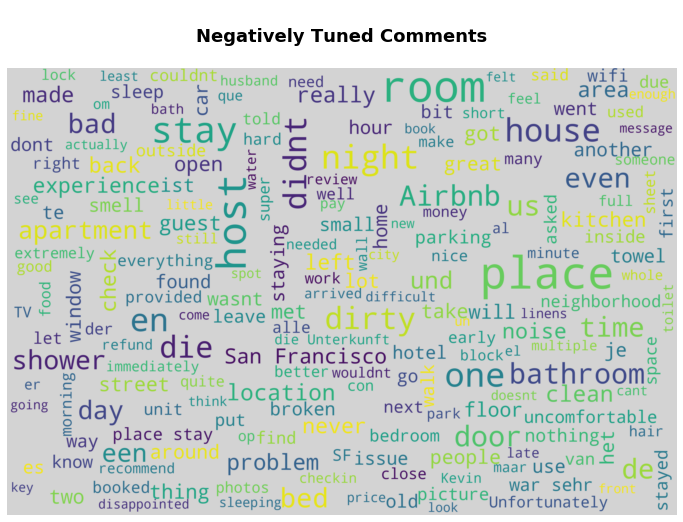

In [108]:
#Create wordcloud
wordcloud = WordCloud(max_font_size=200, max_words=200, background_color="lightgray",
                      width= 3000, height = 2000).generate(str(negative_reviews.comments.values))

#Plot wordcloud
plot_wordcloud(wordcloud, '\nNegatively Tuned')

#What are the most popular words in negative reviews?

In [109]:
#Instantiate CountVectorizer and fit to comments
count = CountVectorizer(stop_words='english').fit(negative_reviews.comments)

#Print length of unique words in negative comments
print('Vocabulary used in negative reviews: {}'.format(len(count.vocabulary_)))

#Create bag of words from comments
bow = count.transform(negative_reviews.comments)
sum_words = bow.sum(axis=0)

#we sort a list of tuples that contain the word and their occurrence in the corpus
words_freq = [(word, sum_words[0, idx]) for word, idx in count.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

Vocabulary used in negative reviews: 4625


In [110]:
#Create df with vocab and their corresponding counts 
negative_words = pd.DataFrame(words_freq, columns =['Word', 'Count']) 

Text(0, 0.5, '')

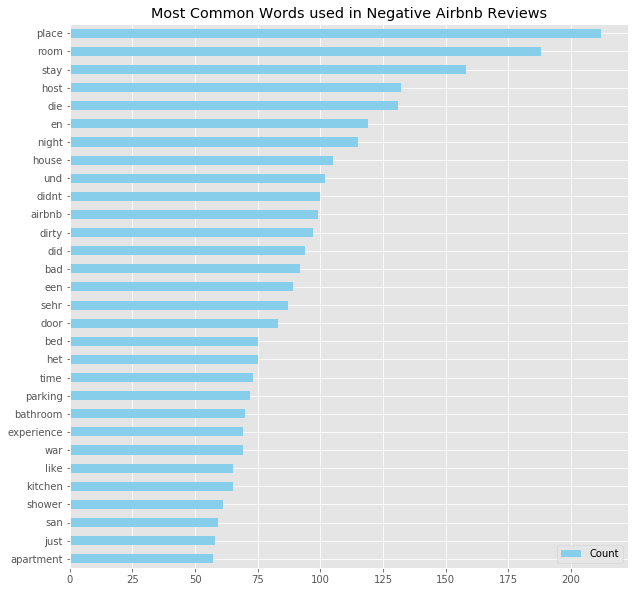

In [111]:
#Capture the 30 most used words
negative_words = negative_words.head(30)

#Plot
fig,ax = plt.subplots(figsize = (10,10))
negative_words.sort_values(by='Count').plot(x = 'Word',y='Count',kind='barh', ax=ax, color = 'skyblue')

#Set plot aesthetics
ax.set_title('Most Common Words used in Negative Airbnb Reviews')
ax.set_ylabel('')

In [112]:
#Topic modeling for negative reviews

In [113]:
#Apply preprocess and stem original comments
docs = np.array(negative_reviews['comments'].apply(preprocess_string))

# Add bigrams and trigrams to docs (only ones that appear 10 times or more).
bigram = Phrases(docs, min_count=10)
trigram = Phrases(bigram[docs])

for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)
    for token in trigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [114]:
#Create dictionary of tokens and print info
dictionary = corpora.Dictionary(docs)
print('Number of unique words in original documents: {}'.format(len(dictionary)))

Number of unique words in original documents: 3777


**Remove rare or common tokens**

In [115]:
#Filter words that occur in less than 10 documents or more than 25% of documents
dictionary.filter_extremes(no_below= 10,no_above=.25 )

print('Number of unique words after removing rare and common words: {}'.format(len(dictionary)))

Number of unique words after removing rare and common words: 344


In [116]:
#Vectorize data
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [117]:
#Initialize Tfidf and fit to corpus
tfidf = models.TfidfModel(corpus)

#Scale and transform corpus
transformed_tfidf = tfidf[corpus]

#Fit transformed data to Lda
lda = models.LdaMulticore(corpus= transformed_tfidf, num_topics=10, id2word=dictionary)

In [118]:
#Create plot
vis = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.038322 -0.003087       1        1  20.946863
6     -0.049618 -0.013751       2        1  16.989737
4     -0.019521  0.060315       3        1  16.297766
3      0.086719  0.020820       4        1  14.827043
2     -0.003592  0.010181       5        1  10.221910
9      0.034589 -0.025718       6        1   5.226625
0     -0.000132 -0.041940       7        1   4.140470
7      0.021890  0.020891       8        1   3.999112
1      0.006841 -0.044691       9        1   3.888222
5     -0.038853  0.016979      10        1   3.462258, topic_info=    Category        Freq            Term       Total  loglift  logprob
6    Default   72.000000             sin   72.000000  30.0000  30.0000
196  Default   61.000000        war_sehr   61.000000  29.0000  29.0000
261  Default   62.000000             mui   62.000000  28.0000  28.0000
17   Default  130.000000             bad  130.000000  27.0000  27.0000
199  Default   48.000000  die_unterkunft   48.000000  26.0000  26.0000
..       ...         ...             ...         ...      ...      ...
261  Topic10    2.443148             mui   62.450054   0.1222  -4.9340
24   Topic10    2.376166             bed   56.651405   0.1918  -4.9618
134  Topic10    2.302521          airbnb   69.026588  -0.0372  -4.9933
17   Topic10    2.373412             bad  130.107773  -0.6408  -4.9630
42   Topic10    2.236353             die   73.639404  -0.1311  -5.0224

[526 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
304       1  0.292480     abl
304       2  0.146240     abl
304       3  0.073120     abl
304       4  0.146240     abl
304       8  0.073120     abl
...     ...       ...     ...
58        3  0.239577  zimmer
58        4  0.119788  zimmer
58        5  0.059894  zimmer
58        7  0.119788  zimmer
58        8  0.119788  zimmer

[2241 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 5, 4, 3, 10, 1, 8, 2, 6])

In [119]:
#what insights can you gain?